In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision matplotlib scikit-learn


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-tb58khsb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-tb58khsb
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Step 2: Import Necessary Libraries

In [3]:
import os
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


Step 3: Load the CLIP Model and Preprocessing Function

Load CLIP with a CPU setup since we are not using a GPU

In [4]:
# Load the CLIP model and preprocessing function
device = "cpu"  # Use CPU
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 89.7MiB/s]


In [5]:
# Get model properties
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

# Print model details
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [6]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7acc9a67e340>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [7]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# images in skimage to use and their textual descriptions
descriptions = {
    "men1": "Eastern man wearing eyeglasses.",
    "men": "Arabic curly haired guy with glasses",
    "bag": "a school bag",
    "coffeecup": "a cup of coffee",
    "cycle": "a bicycle",
    "dog" : "a barking dog",
    "Fan": "a moving fan",
    "fruits": "All Fruits",
    "office": "Mantra Office",
    "phone": "a smartphone",
    "Table": "a table",
    "Tree": "a Tree",
    "watch": "a wristwatch",
    "waterBottle": "a water Bottle",
    "WaterCooler": "a water Cooler",
    "Hailo": "a Hailo device",
    "Ganpatibappa": "Bappa Morya re",
    "car": "a car",
    "building": "a building",
    "bike" : "a bike",
    "laptop" : "a laptop",
    "sakirti" : "a girl",
    "Amar" : "a Talented guy",
    "Sans" : "a mantra employee",
    "cat" : "a cat",
    "astronaut" : "a astronaut",
    "rocket" : "a rocket",
    "chair" : "a chair",
    "apple" : "a apple icon",
    "keyboard" : "a keyboard"
}

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define lists to hold the images and their associated descriptions
original_images = []
images = []
texts = []

# Configure the figure size to accommodate 50 images
plt.figure(figsize=(20, 20))  # Adjust size as needed

# Set grid dimensions to 10 rows and 5 columns to display 50 images
rows = 10
cols = 5

# Define the directory path and filter for image files
image_dir = "/content/drive/MyDrive/ClipExpt_data"
image_filenames = [filename for filename in os.listdir(image_dir)
                   if filename.endswith((".png", ".jpg", ".jpeg"))]



# Ensure the directory has been correctly mounted in Colab (for Google Drive)
assert os.path.exists(image_dir), f"Directory {image_dir} does not exist!"

# Iterate over the first 50 images
for i, filename in enumerate(image_filenames[:50]):
    name = os.path.splitext(filename)[0]

    # Check if there's a description for the image
    if name not in descriptions:
        continue

    # Open and preprocess the image
    image = Image.open(os.path.join(image_dir, filename)).convert("RGB")

    # Add a subplot for each image
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions.get(name, 'No description')}")
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

    # Append images to lists for further processing
    original_images.append(image)
    images.append(preprocess(image))  # Ensure preprocess is correctly defined for CLIP
    texts.append(descriptions[name])

# Adjust the layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

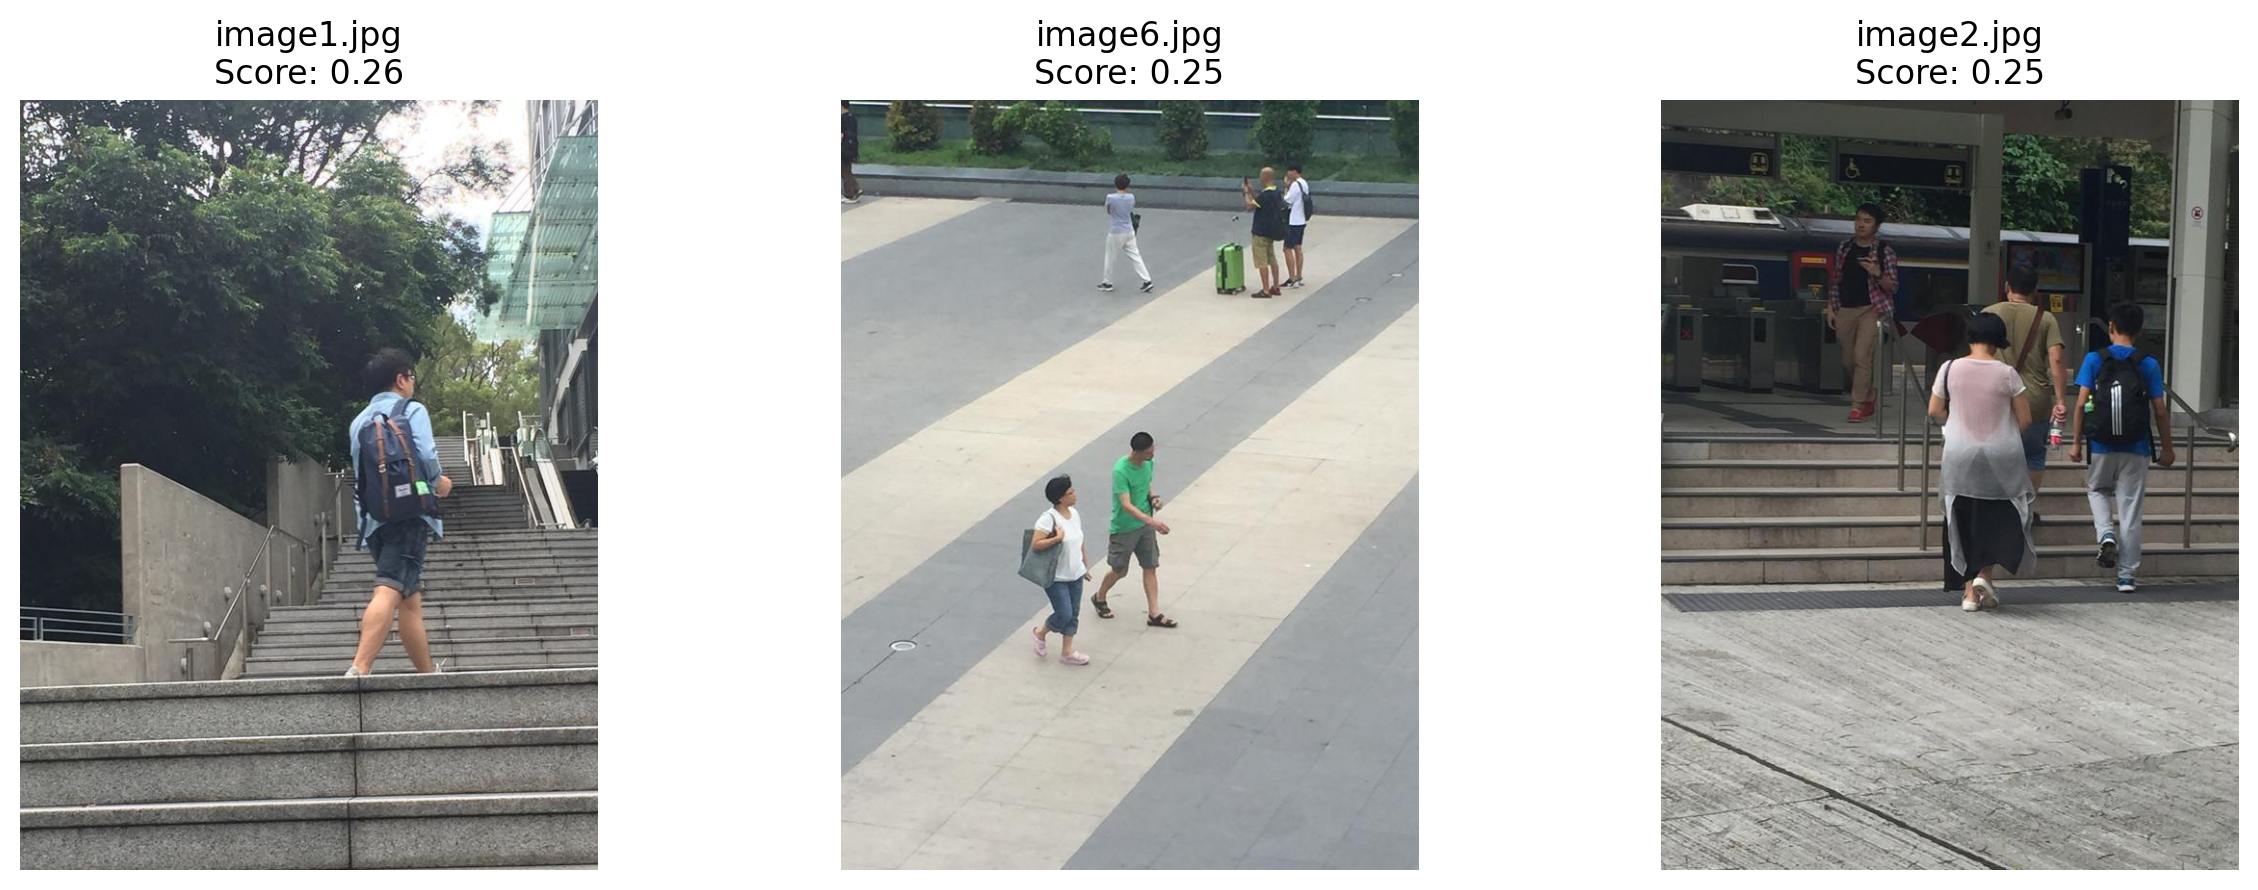

In [ ]:
import os
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# Load the CLIP model and preprocessing
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define the text query
text_query = "a school bag"
text = clip.tokenize([text_query]).to(device)

# Directory containing the images
image_dir = "/content/drive/MyDrive/ClipExpt_data"
image_filenames = [filename for filename in os.listdir(image_dir)
                   if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg")]

# Store images and their similarity scores
image_list = []
similarity_scores = []

# Process each image
for filename in image_filenames[:50]:  # Adjust the limit to the number of images you want to process
    image_path = os.path.join(image_dir, filename)

    # Open and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Encode the image using CLIP's image encoder
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text)

    # Normalize image features
    image_features /= image_features.norm(dim=-1, keepdim=True)

    # Encode the text query
    # with torch.no_grad():
        # text_features = model.encode_text(text)

    # Normalize text features
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute similarity between image and text
    similarity = (image_features @ text_features.T).squeeze(0).item()

    # Store the image and similarity score
    image_list.append((filename, image))
    similarity_scores.append(similarity)

# Sort images by similarity score (higher score means better match)
sorted_images = sorted(zip(similarity_scores, image_list), key=lambda x: x[0], reverse=True)

# Display top 3 images matching the query
plt.figure(figsize=(15, 5))  # Adjust the figure size to fit 3 images
for i, (score, (filename, image)) in enumerate(sorted_images[:3]):  # Change to top 3
    plt.subplot(1, 3, i+1)  # 1 row, 3 columns
    plt.imshow(image)
    plt.title(f"{filename}\nScore: {score:.2f}")
    plt.axis("off")

plt.show()


In [ ]:
#rmdir /content/drive/MyDrive/ClipExp_vest
!rm -rf /content/drive/MyDrive/ClipExp_vest